In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 9)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("admission_prediction1.csv")

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.rename(columns = {'Serial No.': 'SerialNo', 'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'University Rating': 'UniversityRating', 'LOR ': 'LOR', 'Chance of Admit ': 'Chance'}, inplace=True)

In [8]:
df.columns

Index(['SerialNo', 'GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance'],
      dtype='object')

In [9]:
serialNo=df['SerialNo'].values

In [10]:
df.drop("SerialNo",axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE                 500 non-null int64
TOEFL               500 non-null int64
UniversityRating    500 non-null int64
SOP                 500 non-null float64
LOR                 500 non-null float64
CGPA                500 non-null float64
Research            500 non-null int64
Chance              500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [12]:
df.describe()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [17]:
df.columns

Index(['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance'],
      dtype='object')

In [18]:
df.rename(columns = {'Serial No.': 'SerialNo', 'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'University Rating': 'UniversityRating', 'LOR ': 'LOR', 'Chance of Admit ': 'Chance'}, inplace=True)

In [13]:
df.head(5)

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
gre_score = df["GRE"]
gre_score.head()

0    337
1    324
2    316
3    322
4    314
Name: GRE, dtype: int64

In [19]:
chance_of_admit = df["Chance"]


Text(0,0.5,'Chance')

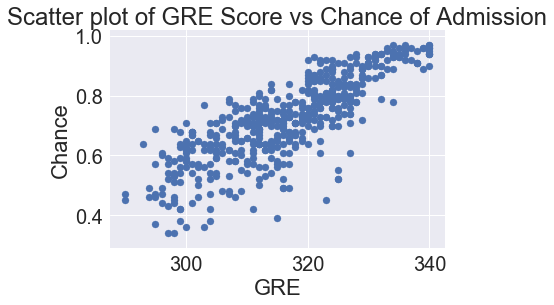

In [22]:
plt.scatter(gre_score, chance_of_admit)
plt.title("Scatter plot of GRE Score vs Chance of Admission")
plt.xlabel("GRE")
plt.ylabel("Chance")

Text(0,0.5,'Chance')

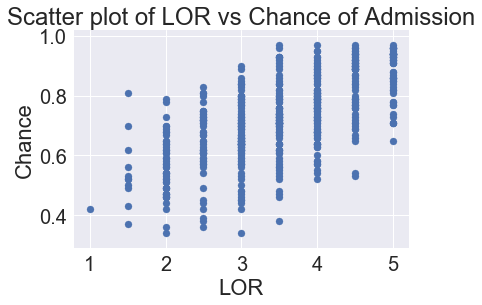

In [23]:
lor = df["LOR"] #letter of recommendation
chance_of_admit = df["Chance"]
plt.scatter(lor, chance_of_admit)
plt.title("Scatter plot of LOR vs Chance of Admission")
plt.xlabel("LOR")
plt.ylabel("Chance")

Text(0,0.5,'Chance')

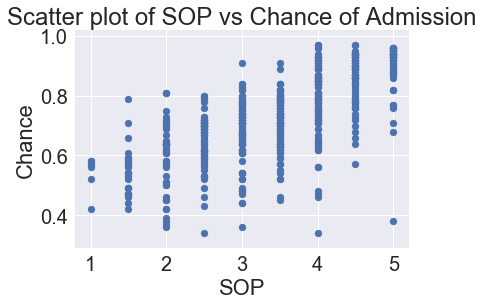

In [25]:
sop = df["SOP"]
chance_of_admit = df["Chance"]
plt.scatter(sop, chance_of_admit)
plt.title("Scatter plot of SOP vs Chance of Admission")
plt.xlabel("SOP")
plt.ylabel("Chance")

Text(0,0.5,'Chance')

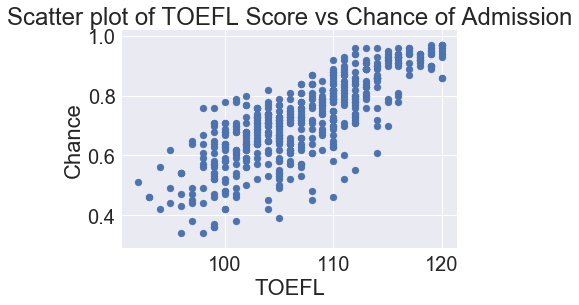

In [26]:
toefl_score = df["TOEFL"]
chance_of_admit = df["Chance"]
plt.scatter(toefl_score, chance_of_admit)
plt.title("Scatter plot of TOEFL Score vs Chance of Admission")
plt.xlabel("TOEFL")

plt.ylabel("Chance")

Text(0,0.5,'Chance')

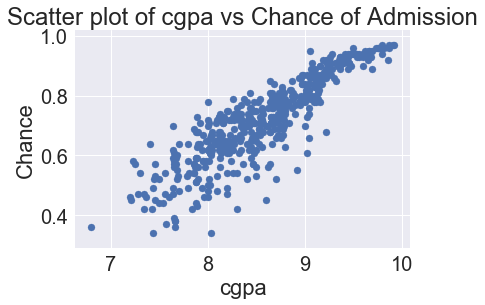

In [27]:
cgpa = df["CGPA"]
chance_of_admit = df["Chance"]
plt.scatter(cgpa, chance_of_admit)
plt.title("Scatter plot of cgpa vs Chance of Admission")
plt.xlabel("cgpa")
plt.ylabel("Chance")

Text(0,0.5,'Chance')

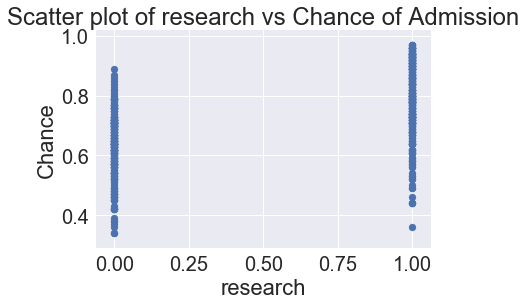

In [28]:
research = df["Research"]
chance_of_admit = df["Chance"]
plt.scatter(research, chance_of_admit)
plt.title("Scatter plot of research vs Chance of Admission")
plt.xlabel("research")
plt.ylabel("Chance")

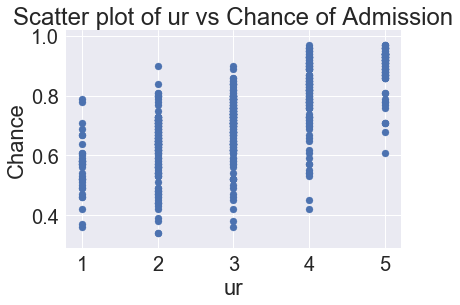

In [29]:
ur = df["UniversityRating"]
chance_of_admit = df["Chance"]
plt.scatter(ur, chance_of_admit)
plt.title("Scatter plot of ur vs Chance of Admission")
plt.xlabel("ur")
plt.ylabel("Chance")
plt.show()

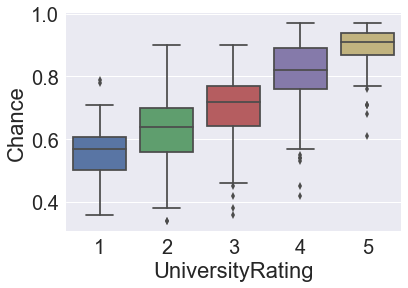

In [33]:
import seaborn as sns

sns.boxplot(x="UniversityRating", y="Chance", data=df)

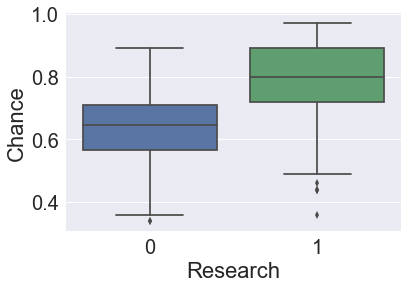

In [34]:
sns.boxplot(x="Research", y="Chance", data=df)

In [36]:
df_grp = df[["UniversityRating", "Chance"]].groupby('UniversityRating', as_index=False).mean()
df_grp

,UniversityRating,Chance
0,1,0.562059
1,2,0.626111
2,3,0.702901
3,4,0.801619
4,5,0.888082


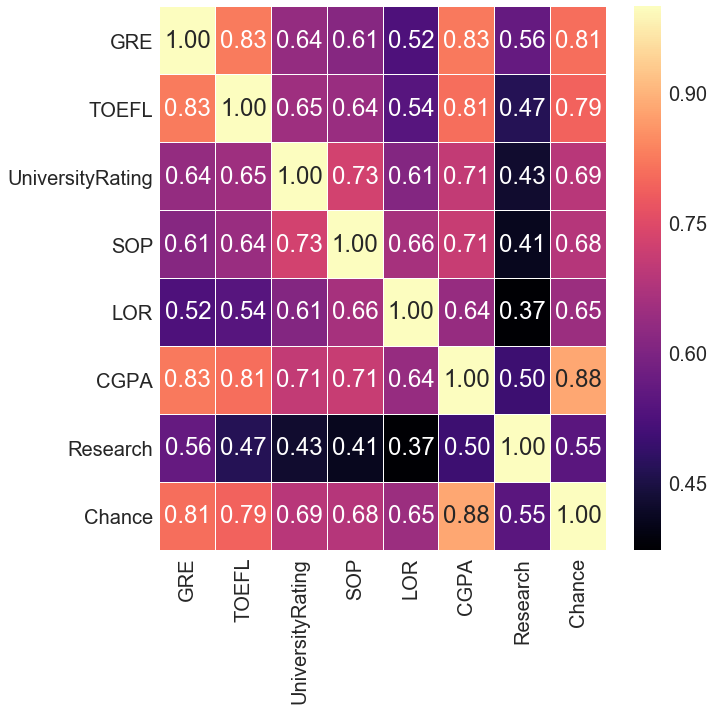

In [37]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

Not Having Research: 220
Having Research: 280


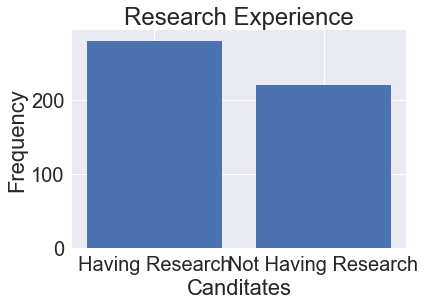

In [38]:
print("Not Having Research:",len(df[df.Research == 0]))
print("Having Research:",len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

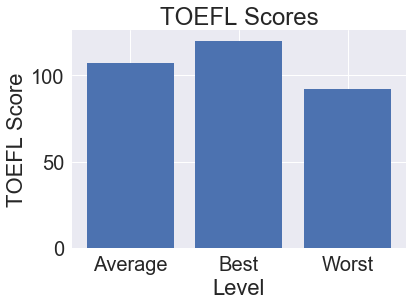

In [39]:
y = np.array([df["TOEFL"].min(),df["TOEFL"].mean(),df["TOEFL"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

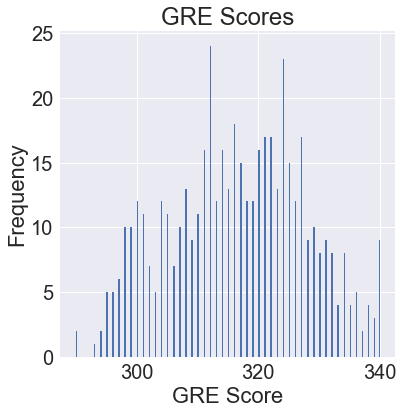

In [40]:
df["GRE"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()


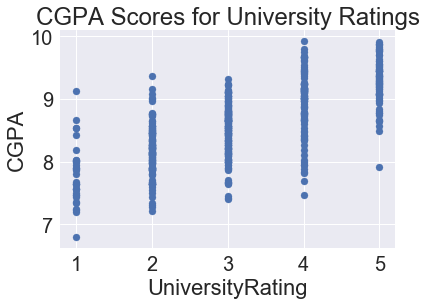

In [41]:
plt.scatter(df["UniversityRating"],df.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("UniversityRating")
plt.ylabel("CGPA")
plt.show()

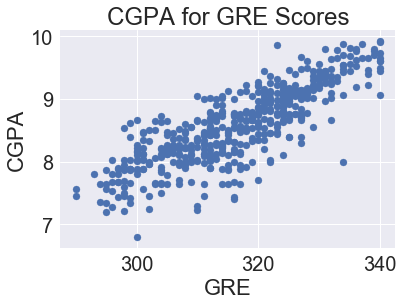

In [42]:
plt.scatter(df["GRE"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE")
plt.ylabel("CGPA")
plt.show()

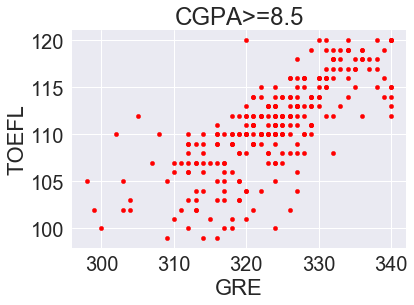

In [43]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE', y='TOEFL',color="red")
plt.xlabel("GRE")
plt.ylabel("TOEFL")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

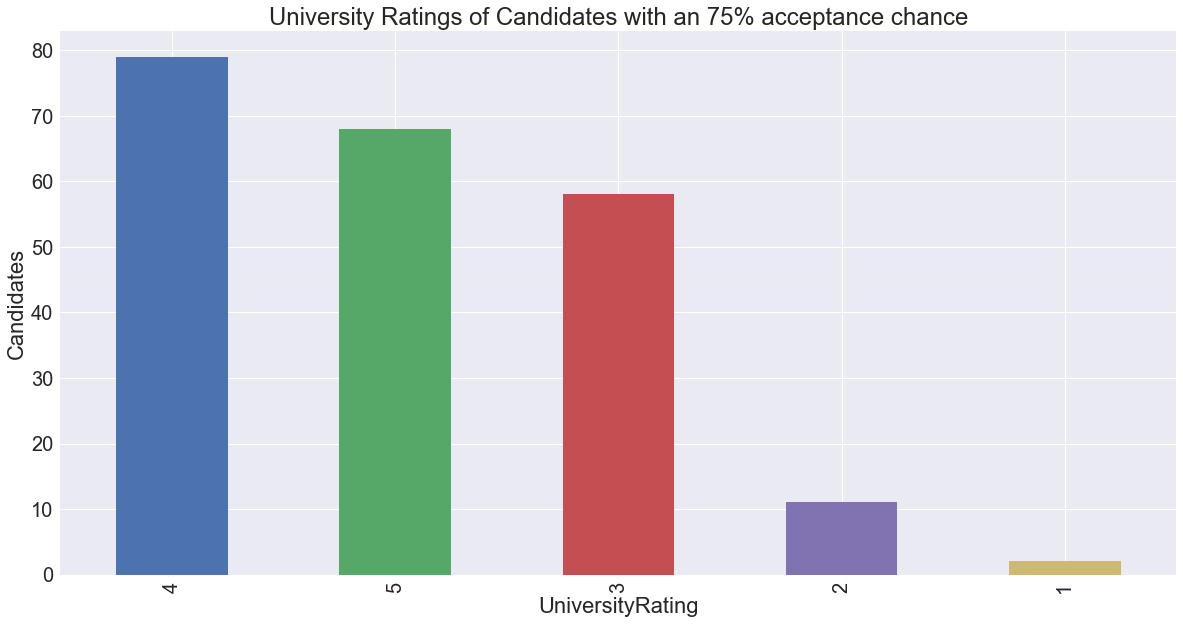

In [39]:
s = df[df["Chance"] >= 0.75]["UniversityRating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("UniversityRating")
plt.ylabel("Candidates")
plt.show()

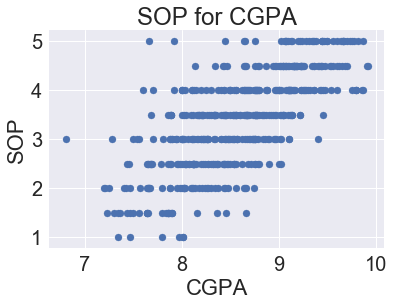

In [44]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

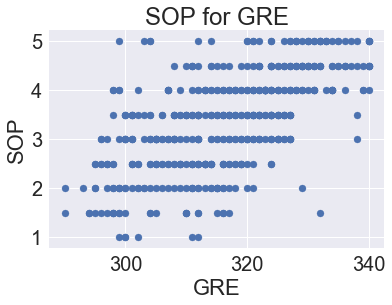

In [45]:
plt.scatter(df["GRE"],df["SOP"])
plt.xlabel("GRE")
plt.ylabel("SOP")
plt.title("SOP for GRE")
plt.show()

In [46]:
df = pd.read_csv("admission_prediction1.csv")

In [47]:
df = pd.read_csv("admission_prediction1.csv",sep = ",")

In [48]:
df.rename(columns = {'Serial No.': 'Serial', 'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'University Rating': 'UniversityRating', 'LOR ': 'LOR', 'Chance of Admit ': 'Chance'}, inplace=True)
df.columns
serialNo = df["Serial"].values
df.drop(["Serial"],axis=1,inplace = True)
df.head()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
df=df.rename(columns = {'Chance of Admit ':'Chance'})
# normalization
y = df["Chance"].values
x_data = df.drop(["Chance"],axis=1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x.head()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
for i in df.columns:
    # Calculate first and third quartile
    first_quartile = df[i].describe()['25%']
    third_quartile = df[i].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile
	
    # Remove outliers
    df = df[(df[i] > (first_quartile - 3 * iqr)) & (df[i] < (third_quartile + 3 * iqr))]

In [48]:
correlations_data = df.corr()['Chance'].sort_values(ascending=False)

# Print the correlations
print(correlations_data)

Chance              1.000000
CGPA                0.882413
GRE                 0.810351
TOEFL               0.792228
UniversityRating    0.690132
SOP                 0.684137
LOR                 0.645365
Research            0.545871
Name: Chance, dtype: float64


In [67]:
###################
#Linear Regression part 1
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.05,random_state = 42)

In [68]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
y_head_lr = lr.predict(x_test)
y_head_lr

array([0.91096703, 0.79845173, 0.5698958 , 0.71081695, 0.81163536,
       0.85940641, 0.47941731, 0.66060507, 0.82302766, 0.80835087,
       0.7202909 , 0.7274033 , 0.65672284, 0.93325738, 0.82153795,
       0.51727525, 0.83916143, 0.59958117, 0.53963679, 0.57738742,
       0.66325078, 0.56494293, 0.72262723, 0.78930274, 0.77515721])

In [70]:
print('y = ',lr.coef_[0],'x',lr.intercept_)

y =  0.10157503304679136 x 0.35196282693164016


In [71]:
from sklearn.metrics import r2_score
print("r_square score(TEST DATA): ", r2_score(y_test,y_head_lr))

y_head_lr1 = lr.predict(x_train)
y_head_lr1

r_square score(TEST DATA):  0.7367119329431684


array([0.60884929, 0.94812051, 0.84450236, 0.62675122, 0.74647375,
       0.56220591, 0.73117604, 0.54677059, 0.86078917, 0.65512893,
       0.73499762, 0.55584446, 0.95611756, 0.64715535, 0.70543388,
       0.96326772, 0.57618633, 0.6689193 , 0.85541641, 0.93912248,
       0.58276643, 0.95234662, 0.83665105, 0.79355238, 0.92612912,
       0.8919248 , 0.5670288 , 0.71571493, 0.52454966, 0.95116025,
       0.59560431, 0.95117384, 0.73930044, 0.67056561, 0.5045318 ,
       0.63730999, 0.67907819, 0.6023121 , 0.60291558, 0.44454132,
       0.5859459 , 0.8655023 , 0.89862343, 0.66308466, 0.70911963,
       0.61783563, 0.78069665, 0.68942628, 0.56227381, 0.55678944,
       0.65093203, 0.84526605, 0.8606488 , 0.53953184, 0.64120003,
       0.76779166, 0.85221033, 0.62472008, 0.84693705, 0.72920228,
       0.65817403, 0.61134963, 0.73786774, 0.79315311, 0.66433567,
       0.74149921, 0.9063318 , 0.91202791, 0.65283975, 0.770047  ,
       0.43833848, 0.68655366, 0.77573563, 0.72536967, 0.65055

In [72]:
y_head_lr1 = lr.predict(x_train)
y_head_lr1

array([0.60884929, 0.94812051, 0.84450236, 0.62675122, 0.74647375,
       0.56220591, 0.73117604, 0.54677059, 0.86078917, 0.65512893,
       0.73499762, 0.55584446, 0.95611756, 0.64715535, 0.70543388,
       0.96326772, 0.57618633, 0.6689193 , 0.85541641, 0.93912248,
       0.58276643, 0.95234662, 0.83665105, 0.79355238, 0.92612912,
       0.8919248 , 0.5670288 , 0.71571493, 0.52454966, 0.95116025,
       0.59560431, 0.95117384, 0.73930044, 0.67056561, 0.5045318 ,
       0.63730999, 0.67907819, 0.6023121 , 0.60291558, 0.44454132,
       0.5859459 , 0.8655023 , 0.89862343, 0.66308466, 0.70911963,
       0.61783563, 0.78069665, 0.68942628, 0.56227381, 0.55678944,
       0.65093203, 0.84526605, 0.8606488 , 0.53953184, 0.64120003,
       0.76779166, 0.85221033, 0.62472008, 0.84693705, 0.72920228,
       0.65817403, 0.61134963, 0.73786774, 0.79315311, 0.66433567,
       0.74149921, 0.9063318 , 0.91202791, 0.65283975, 0.770047  ,
       0.43833848, 0.68655366, 0.77573563, 0.72536967, 0.65055

In [73]:
print('Mean Squared Error with x_test: %.5f' % np.mean((y_test-y_head_lr)**2))
print('Mean Squared Error with x_train: %.5f' % np.mean((y_train-y_head_lr1)**2))

Mean Squared Error with x_test: 0.00651
Mean Squared Error with x_train: 0.00339


In [74]:
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

real value of y_test[1]: 0.84 -> the predict: [0.79845173]
real value of y_test[2]: 0.39 -> the predict: [0.5698958]


In [75]:
y_head_lr_train = lr.predict(x_train)

In [76]:
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

r_square score (train dataset):  0.826889064162938


# randomforest

In [79]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test) 

In [80]:
from sklearn.metrics import r2_score
#
print("r_square score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))
print("real value of y_test[2]: " + str(y_test[3]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[3],:])))
#

r_square score:  0.6897035127831699
real value of y_test[1]: 0.84 -> the predict: [0.79111]
real value of y_test[2]: 0.39 -> the predict: [0.61344]
real value of y_test[2]: 0.77 -> the predict: [0.7071]


In [81]:
y_head_rf_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_rf_train))

r_square score (train dataset):  0.9722999718479022


In [1]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))
#
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))
#
y_head_dtr_train = dtr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_dtr_train))

NameError: name 'x_train' is not defined